<a href="https://colab.research.google.com/github/essiesalari/Titanic-ML/blob/main/TitanicML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic ML Project**




## Import Libraries and Dataset





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Clone the GitHub repository
!git clone https://github.com/essiesalari/Titanic-ML.git

%cd Titanic-ML
%cd dataset
!unzip titanic.zip

Cloning into 'Titanic-ML'...
remote: Enumerating objects: 111, done.
remote: Counting objects: 100% (111/111), done.
remote: Compressing objects: 100% (108/108), done.
remote: Total 111 (delta 34), reused 8 (delta 0), pack-reused 0
Receiving objects: 100% (111/111), 484.07 KiB | 5.98 MiB/s, done.
Resolving deltas: 100% (34/34), done.
/content/Titanic-ML
[Errno 2] No such file or directory: 'dataset'
/content/Titanic-ML
Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [3]:
# Read data into Pandas DataFrame
df_gen_sub = pd.read_csv('gender_submission.csv')
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')

## EDA

In [4]:
# Dataset shape
print(df_gen_sub.shape, df_test.shape, df_train.shape)

(418, 2) (418, 11) (891, 12)


In [5]:
df_train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [6]:
# Check for missing values
print("train nulls")
print(df_train.isnull().sum())
print("\ntest nulls")
print(df_test.isnull().sum())

train nulls
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

test nulls
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


### Dsitributions

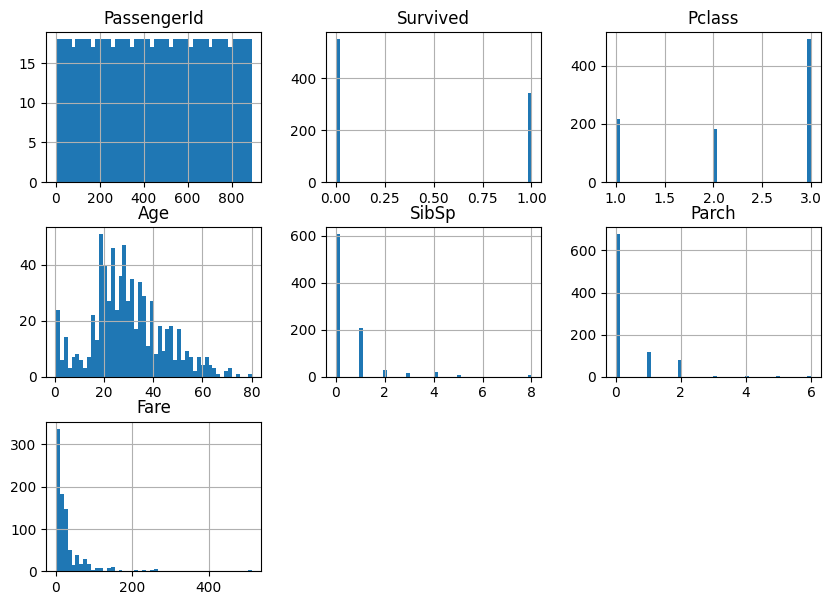

In [7]:
# Vusualize distributions
df_train.hist(bins=50, figsize=(10,7))
plt.show()

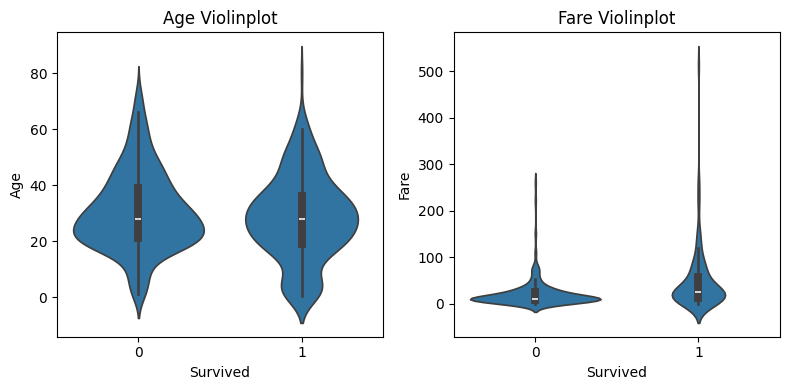

In [8]:
fig, axes =plt.subplots(1, 2, figsize=(8, 4))

sns.violinplot(x='Survived', y='Age', data=df_train, ax=axes[0])
axes[0].set_title('Age Violinplot')

sns.violinplot(x='Survived', y='Fare', data=df_train, ax=axes[1])
axes[1].set_title('Fare Violinplot')

plt.tight_layout()
plt.show()

### Correlations

<ipython-input-9-656523efd7a6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_train.corr()


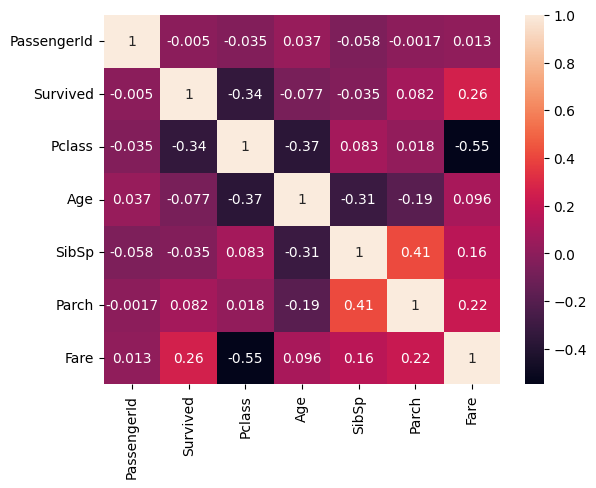

In [9]:
# Vusualize the correlations
corr_matrix = df_train.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [10]:
# Pclass and Fare correlation _ statistical analysis
from scipy.stats import pearsonr

corr, p_value = pearsonr(df_train['Pclass'], df_train['Fare'])
print(f'Pearson Correlation Coeff. Fare&Pclass: {corr}')
print(f'p_value Fare&Pclass: {p_value}')

Pearson Correlation Coeff. Fare&Pclass: -0.5494996199439078
p_value Fare&Pclass: 1.967386173422602e-71


### Survival Rates

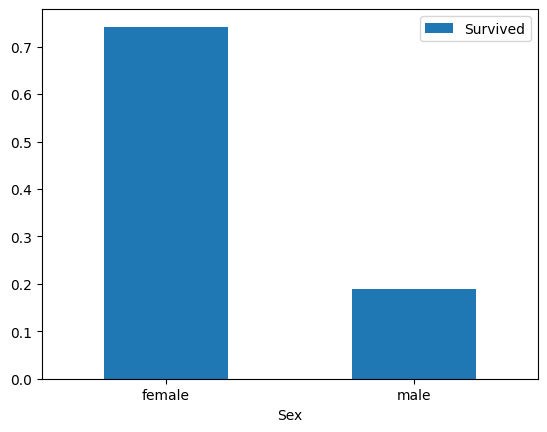

In [11]:
# Survival rates
## Explore survival rates by sex
df_train.groupby('Sex')[['Survived']].mean().plot(kind='bar')
plt.xticks(rotation=0)
plt.show();

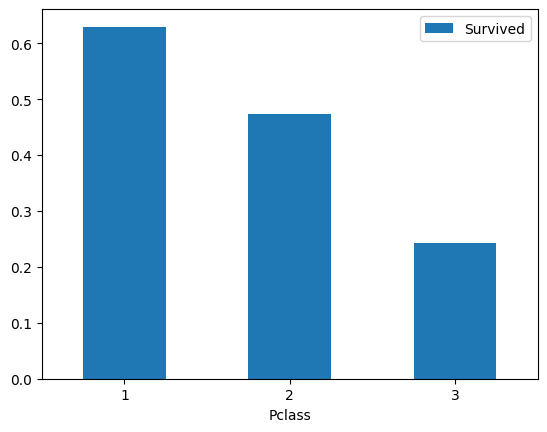

In [12]:
## Explore survival rates by class
df_train.groupby('Pclass')[['Survived']].mean().plot(kind='bar')
plt.xticks(rotation=0)
plt.show();

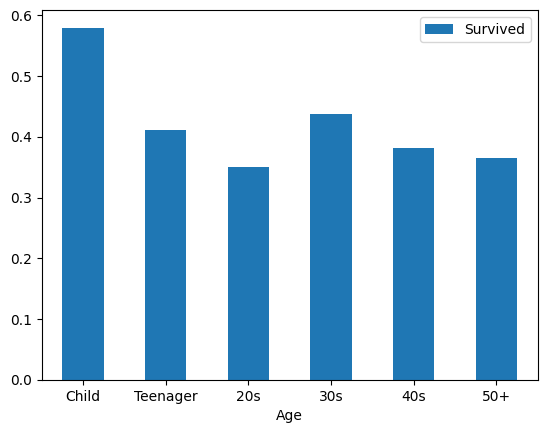

In [13]:
## Explore survival rates by age
bins = [0, 12, 19, 29, 39, 49, np.inf]
labels = ['Child', 'Teenager', '20s', '30s', '40s', '50+']
df_train.groupby(pd.cut(df_train['Age'], bins=bins, labels=labels))[['Survived']].mean().plot(kind='bar')
plt.xticks(rotation=0)
plt.show();

In [14]:
# Chi_Square statistical test for Age means
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df_train['Survived'], pd.cut(df_train['Age'], bins=bins, labels=labels))
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f'Chi_Square statistic: {chi2}')
print(f'p_value: {p_value}')

Chi_Square statistic: 12.902914802478813
p_value: 0.024305747751816542


# Preprocessing

## Handel Missing Values


In [15]:
# Drop useless columns in ML
df_train = df_train.drop(['Name', 'Ticket'], axis=1)
df_test = df_test.drop(['Name', 'Ticket'], axis=1)

# Encoding categorical feilds
from sklearn.preprocessing import LabelEncoder
columns_to_encode = ['Sex', 'Cabin', 'Embarked']
for column in columns_to_encode:
    le = LabelEncoder()
    le.fit(pd.concat([df_train[column], df_test[column]]))
    df_train[column] = le.transform(df_train[column])
    df_test[column] = le.transform(df_test[column])

In [16]:
# Run IterativeImputer method
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=15, random_state=42)

df_train_dropped = df_train.drop(['Survived'], axis=1) # Drop the Survived column from df_train before imputation

df_imputed_train = imp.fit_transform(df_train_dropped)
df_imputed_test = imp.transform(df_test)

df_imputed_train = pd.DataFrame(df_imputed_train, columns=df_train_dropped.columns)
df_imputed_test = pd.DataFrame(df_imputed_test, columns=df_test.columns)

df_imputed_train = pd.concat([df_imputed_train, df_train['Survived']], axis=1) # Concatenate the Survived column back to df_imputed_train

## Handel Outliers

In [17]:
from scipy import stats

threshold = 3
for column in ['Age', 'Fare', 'SibSp', 'Parch']:
  z_scores = stats.zscore(df_imputed_train[column])
  outliers = np.abs(z_scores) > threshold
  print(f'Number of outliers in {column} : {outliers.sum()}')
  median = df_imputed_train.loc[~outliers, column].median()
  df_imputed_train.loc[outliers, column] = median

Number of outliers in Age : 5
Number of outliers in Fare : 20
Number of outliers in SibSp : 30
Number of outliers in Parch : 15


## Scaling

In [18]:
X = df_imputed_train.drop('Survived', axis=1)
y = df_imputed_train['Survived']

In [19]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X)
df_train_scaled = sc.transform(X)

# ML Modles

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
!pip install Xgboost
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Metrics
from sklearn.metrics import roc_auc_score

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


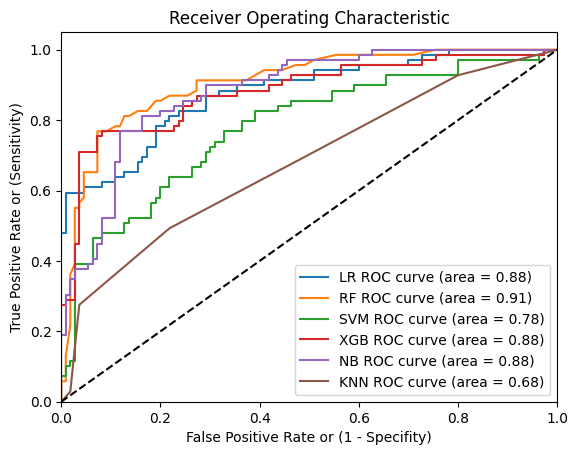

In [22]:
# Evalute Classifiers
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

## Define the models
models = {
    "LR" : LogisticRegression(),
    'RF' : RandomForestClassifier(),
    'SVM' : svm.SVC(probability=True),
    'XGB' : XGBClassifier(),
    'NB' : GaussianNB(),
    'KNN' : KNeighborsClassifier()
}

plt.figure()

## Calculate ROC and AUC for each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} ROC curve (area = {roc_auc:.2f})')

## ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.show()

## Random Forest Model | Hyper Parameter Tuning

In [23]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start=200, stop=2000, num=10)],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)] + [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)


rf_random.fit(X_train, y_train)

best_model = rf_random.best_estimator_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


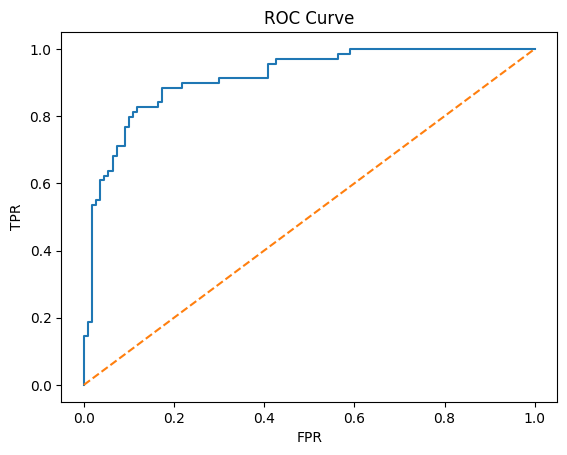

AUC: 0.9148880105401844


In [24]:
# ROC curve
probs = best_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probs)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()


auc = roc_auc_score(y_test, probs)
print(f'AUC: {auc}')

## Prediction

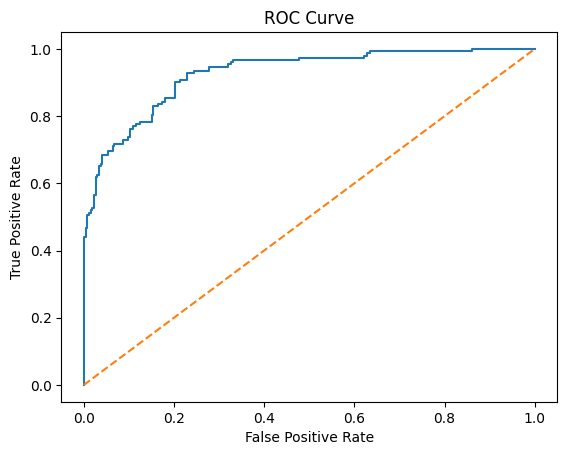

AUC: 0.9260734072022161


In [25]:
# Predict probabilities
probs = best_model.predict_proba(df_imputed_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(df_gen_sub['Survived'], probs)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate AUC
auc = roc_auc_score(df_gen_sub['Survived'], probs)
print(f'AUC: {auc}')


In [32]:
# Get feature importances
importances = best_model.feature_importances_
feature_importances = pd.DataFrame({'feature': list(X_train), 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False)
feature_importances

,feature,importance
2,Sex,0.383766
6,Fare,0.146048
3,Age,0.141162
1,Pclass,0.100084
0,PassengerId,0.092536
7,Cabin,0.072477
8,Embarked,0.027253
4,SibSp,0.018811
5,Parch,0.017864
